# The Solution of Nonlinear Equations

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />This notebook by Xiaozhou Li is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
All code examples are also licensed under the [MIT license](http://opensource.org/licenses/MIT).

One of the most frequently occurring problems in scientific work is to find the roots of equations of the form
\begin{equation}
    f(x) = 0,
\end{equation}
i.e., zeros of the function $f(x)$.

## The Bisection Method
The first step to solving an equation is to verify that a root exists.
### Theorem
   Let $f$ be a continuous function on $[a, b]$, satisfying $f(a)f(b) < 0$. Then $f$ has a root between $a$ and $b$, that is, there exists a number $x^{*}$ satisfying $a < x^{*} < b$ and $f(x^{*}) = 0$.

### Bisection Method 
**Algorithm:**
```python
    Given initial interval [a, b] such that f (a)f (b) < 0 
    while (b − a)/2 > TOL:
        c = (a + b)/2
    if f (c) = 0:
        stop 
    if f(a)f(c) < 0:
        b=c 
    else:
        a=c
    The final interval [a,b] contains a root. 
    The approximate root is (a + b)/2.
```

**Python implementation:**

In [1]:
# environment setting, before any codes
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

In [2]:
def bisect(f, a, b, tol):
    if (np.sign(f(a)*f(b)) >= 0):      # wrong input
        print ('$f(a)f(b) <0$ not satisfied')
        return
    fa = f(a) 
    fb = f(b)
    while ((b - a)/2) > tol:
        c = (a + b)/2;
        fc = f(c)
        if fc == 0:                 # c is a solution, done
            return c 
        if (np.sign(fc*fa) < 0):       # new interval [a, c]
            b = c; 
            fb = fc
        else:                       # new interval [c, b]
            a = c
            fa = fc
    return (a + b)/2                #new midpoint is best estimate

**Demonstration version:**

In [3]:
def bisect_iters(f, a, b, iters):
    fa = f(a) 
    fb = f(b)
    
    x = np.zeros(iters+1)
    for i in range(iters):
        c = (a + b)/2
        x[i] = c
        fc = f(c)
        if fc == 0:                 # c is a solution, done
            return c 
        if (np.sign(fc*fa) < 0):       # new interval [a, c]
            b = c; 
            fb = fc
        else:                       # new interval [c, b]
            a = c
            fa = fc
    x[iters] = (a + b)/2       
    return x              #new midpoint is best estimate

**Exmaple**
    Use Bisection Method to find the root of $f(x) = e^{-x} - \sin\left(\frac{\pi x}{2}\right)$ on $[0,1]$.

In [4]:
def fun(x):
    return np.exp(-x) - np.sin(np.pi/2*x)

Reference Solution:  0.4435735341042957
no.    solution    error bound    error
  0  0.5000000000   5.00e-01    5.64e-02
  1  0.2500000000   2.50e-01    1.94e-01
  2  0.3750000000   1.25e-01    6.86e-02
  3  0.4375000000   6.25e-02    6.07e-03
  4  0.4687500000   3.12e-02    2.52e-02
  5  0.4531250000   1.56e-02    9.55e-03
  6  0.4453125000   7.81e-03    1.74e-03
  7  0.4414062500   3.91e-03    2.17e-03
  8  0.4433593750   1.95e-03    2.14e-04
  9  0.4443359375   9.77e-04    7.62e-04
 10  0.4438476562   4.88e-04    2.74e-04


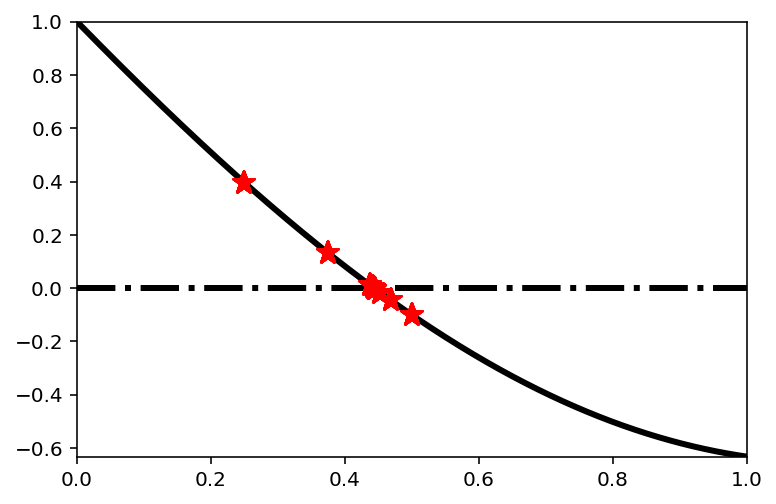

In [5]:
def Iteration_demo(f, a, b, iters):
    x = np.linspace(a, b, 1000)
    plt.plot(x, f(x), 'k', linewidth=3)
    plt.plot(x, 0*x, 'k-.', linewidth=3)
    x = bisect_iters(f, a, b, iters)
    x_ref = bisect(f, a, b, 1.e-14)
    
    #print (x)
    plt.xlim(a,b)
    plt.ylim(min(f(a),f(b)),max(f(a),f(b)))
    #plt.ylim(1,2)
    for i in range(iters+1):
        plt.plot(x, f(x), 'r*', markersize=12, linewidth=3)
    
    print ('Reference Solution: ', x_ref)
    print ('no.    solution    error bound    error')
    for i in range(iters+1):
        print ("%3d  %12.10f   %7.2e    %7.2e" % \
                   (i, x[i], (b-a)/2**(i+1), np.abs(x_ref - x[i])))
    
        
a = 0
b = 1
Iteration_demo(fun, a, b, 10)

In [6]:
w = interactive(Iteration_demo, f=fixed(fun), a=fixed(0), b=fixed(1), iters=widgets.IntSlider(min=0,max=50,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=50), Output()), _dom_classes=('widget-interact',))

**Exmaple**
    Use Bisection Method to find the root of $f(x) = x^3 + x - 1$ on $[0,1]$.

In [7]:
def fun2(x):
    return x - 1./3.

w = interactive(Iteration_demo, f=fixed(fun2), a=fixed(0), b=fixed(1), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-interact',))

## Fixed Point Iteration

In [8]:
def fixed_iters(g, x0, iters):
    x = np.zeros(iters+1)
    x[0] = x0
    for i in range(iters):
        x[i+1] = g(x[i])
    return x

def g(x):
    return np.cos(x)

fixed_iters(g, 1., 20)

array([1.        , 0.54030231, 0.85755322, 0.65428979, 0.79348036,
       0.70136877, 0.76395968, 0.72210243, 0.75041776, 0.73140404,
       0.74423735, 0.73560474, 0.74142509, 0.73750689, 0.74014734,
       0.7383692 , 0.7395672 , 0.73876032, 0.73930389, 0.73893776,
       0.7391844 ])

In [9]:
def Iteration_demo2(f, a, b, g, x0, iters):
    x = np.linspace(a, b, 1000)
    plt.plot(x, f(x), 'k', linewidth=3)
    plt.plot(x, 0*x, 'k-.', linewidth=3)
    x = fixed_iters(g, x0, iters)
    x_ref = bisect(f, a+1.e-8, b, 1.e-14)
    
    #print (x)
    plt.xlim(a,b)
    plt.ylim(min(f(a),f(b)),max(f(a),f(b)))
    for i in range(iters+1):
        plt.plot(x, f(x), 'r*', markersize=12, linewidth=3)
    
    print ('Reference Solution: ', x_ref)
    print ('no.    solution    |x_{n+1} - x_{n}|    error')
    for i in range(iters+1):
        if (i < iters):
            print ("%3d  %14.12f      %7.2e       %7.2e" % \
                   (i, x[i], np.abs(x[i+1]-x[i]), np.abs(x_ref - x[i])))
        else:
            print ("%3d  %14.12f      %7.2e       %7.2e" % \
                   (i, x[i], np.abs(g(x[i])-x[i]), np.abs(x_ref - x[i])))

**Example** Use Fixed Point Iteration to find a root of $f(x) = x^3 + 4x^2 - 10$ on $[1, 2]$ with $g_1(x) = \sqrt{\frac{10}{x} - 4x}$ and $g_2(x) = \sqrt{\frac{10}{x+4}}$, the initial guess $x_0 = 1.5$.

In [10]:
def f(x):
    return x**3 + 4*x**2 - 10

a = 1; b = 2;

def g1(x):
    return np.sqrt(10/x - 4*x)

def g2(x):
    return np.sqrt(10/(x+4))

x0 = 1.5

w = interactive(Iteration_demo2, f=fixed(f), a=fixed(a), b=fixed(b), g=fixed(g2), x0 = fixed(x0), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-interact',))

In [11]:
w = interactive(Iteration_demo, f=fixed(f), a=fixed(1), b=fixed(2), iters=widgets.IntSlider(min=0,max=50,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=50), Output()), _dom_classes=('widget-interact',))

**Example** Find the fixed points of $g(x) = 2.8x - x^2$

In [12]:
def f(x):
    return 1.8*x - x**2

a = 0; b = 2;

def g(x):
    return 2.8*x - x**2

x0 = 0.1

w = interactive(Iteration_demo2, f=fixed(f), a=fixed(a), b=fixed(b), g=fixed(g), x0 = fixed(x0), iters=widgets.IntSlider(min=0,max=40,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=40), Output()), _dom_classes=('widget-interact',))

**Example** Use Fixed Point Iteration to find the positive root of $f(x) = x^2 - 3$ with $g_1(x) = x - \frac{1}{4}(x^2-3)$ and $g_2(x) = \frac{1}{2}\left(x + \frac{3}{x}\right)$.

In [13]:
def f(x):
    return x**2 - 3

a = 0; b = 2

def g1(x):
    return x - 0.25*(x**2-3)

def g2(x):
    return 0.5*(x + 3/x)

x0 = 2

w = interactive(Iteration_demo2, f=fixed(f), a=fixed(a), b=fixed(b), g=fixed(g1), x0 = fixed(x0), iters=widgets.IntSlider(min=0,max=40,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=40), Output()), _dom_classes=('widget-interact',))

## Newton's Method

In [14]:
def Newton_iters(f, f_der, x0, iters):
    x = np.zeros(iters+1)
    x[0] = x0
    for i in range(iters):
        x[i+1] = x[i] - f(x[i])/f_der(x[i])
    return x

def f(x):
    return x**2 - 3

def f_der(x):
    return 2*x

Newton_iters(f, f_der, 1., 20)

array([1.        , 2.        , 1.75      , 1.73214286, 1.73205081,
       1.73205081, 1.73205081, 1.73205081, 1.73205081, 1.73205081,
       1.73205081, 1.73205081, 1.73205081, 1.73205081, 1.73205081,
       1.73205081, 1.73205081, 1.73205081, 1.73205081, 1.73205081,
       1.73205081])

**Example** Find the positive root of $f(x) = x^2 - a$ by Newton's Methods

The iterations is 
\begin{equation}
    x_{n+1} = \left(x_n + \frac{a}{x_n}\right)/2 
\end{equation}

In [15]:
def Iteration_demo3(f, f_der, a, b, x0, x_star, iters):
    x = np.linspace(a, b, 1000)
    plt.plot(x, f(x), 'k', linewidth=3)
    plt.plot(x, 0*x, 'k-.', linewidth=3)
    x = Newton_iters(f, f_der, x0, iters)
    #x_ref = bisect(f, a+1.e-8, b, 1.e-14)
    
    #print (x)
    plt.xlim(a,b)
    #plt.ylim(min(f(a),f(b)),max(f(a),f(b)))
    for i in range(iters+1):
        plt.plot(x, f(x), 'r*', markersize=12, linewidth=3)
    
    print ('Reference Solution: ', x_star)
    print ('no.    solution    |x_{n} - x_{*}|    e_{n}/e_{n-1}^2   e_{n}/e_{n-1}')
    for i in range(iters+1):
        if (i < 1):
            print ("%3d  %14.12f      %7.2e" % \
                   (i, x[i], np.abs(x_star - x[i])))
        else:
            print ("%3d  %14.12f      %7.2e           %6.4f          %6.4f" % \
                   (i, x[i], np.abs(x_star - x[i]), np.abs(x_star - x[i])/(x_star - x[i-1])**2, \
                   np.abs(x_star - x[i])/np.abs(x_star - x[i-1])))

In [16]:
1/2/np.sqrt(10)

0.15811388300841897

In [17]:
def f(x): 
    return x**2 - 20

def f_der(x):
    return 2*x

x0 = 3
x_star = np.sqrt(20)
w = interactive(Iteration_demo3, f=fixed(f), f_der=fixed(f_der), a=fixed(a), b=fixed(b), x0 = fixed(x0), \
                x_star = fixed(x_star), iters=widgets.IntSlider(min=0,max=10,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=10), Output()), _dom_classes=('widget-interact',))

**Example** Find the root of $f(x) = x^3 + 10x - 20$ around $x_0 = 1.5$ by Newton's Methods

The iterations is 
\begin{equation}
    x_{n+1} = x_n - \frac{x^3 + 10x - 20}{3x^2 + 10}
\end{equation}

In [18]:
def f(x): 
    return x**3 + 10*x - 20

def f_der(x):
    return 3*x**2 + 10

x0 = 1.5
a = 1 
b = 2 
x_star = bisect(f, a, b, 1.e-14)
w = interactive(Iteration_demo3, f=fixed(f), f_der=fixed(f_der), a=fixed(a), b=fixed(b), x0 = fixed(x0), \
                x_star = fixed(x_star), iters=widgets.IntSlider(min=0,max=10,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=10), Output()), _dom_classes=('widget-interact',))

**Example** Find the root of $f(x) = x^3 - 3x + 2$ around $x_0 = 1.1$ by Newton's Methods

The iterations is 
\begin{equation}
    x_{n+1} = x_n - \frac{x^3 - 3x + 2}{3x^2 - 3}
\end{equation}

In [19]:
def f(x): 
    return x**3 - 3*x +2

def f_der(x):
    return (3*x**2 - 3)/2.

x0 = 1.5
a = -3. 
b = 3. 
x_star = 1.
w = interactive(Iteration_demo3, f=fixed(f), f_der=fixed(f_der), a=fixed(a), b=fixed(b), x0 = fixed(x0), \
                x_star = fixed(x_star), iters=widgets.IntSlider(min=0,max=30,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=30), Output()), _dom_classes=('widget-interact',))

In [20]:
## Secant Method

In [21]:
def secant_iters(f, x0, x1, iters):
    x = np.zeros(iters+1)
    x[0] = x0
    if (iters >= 1):
        x[1] = x1
        for i in range(1,iters):
            x[i+1] = x[i] - f(x[i])*(x[i]-x[i-1])/(f(x[i]) - f(x[i-1]))
    return x

def f(x):
    return x**2 - 3

secant_iters(f, 1., 2., 0)

array([1.])

In [22]:
def Iteration_demo4(f, a, b, x0, x1, x_star, iters):
    x = np.linspace(a, b, 1000)
    plt.plot(x, f(x), 'k', linewidth=3)
    plt.plot(x, 0*x, 'k-.', linewidth=3)
    x = secant_iters(f, x0, x1, iters)
    #x_ref = bisect(f, a+1.e-8, b, 1.e-14)
    
    #print (x)
    plt.xlim(a,b)
    #plt.ylim(min(f(a),f(b)),max(f(a),f(b)))
    for i in range(iters+1):
        plt.plot(x, f(x), 'r*', markersize=12, linewidth=3)
    
    print ('Reference Solution: ', x_star)
    print ('no.    solution    |x_{n} - x^{*}|    e_{n}/e_{n-1}^1.618   e_{n}/e_{n-1}')
    for i in range(iters+1):
        if (i < 1):
            print ("%3d  %14.12f      %7.2e" % \
                   (i, x[i], np.abs(x_star - x[i])))
        else:
            print ("%3d  %14.12f      %7.2e           %6.4f          %6.4f" % \
                   (i, x[i], np.abs(x_star - x[i]), np.abs(x_star - x[i])/np.abs(x_star - x[i-1])**1.618, \
                   np.abs(x_star - x[i])/np.abs(x_star - x[i-1])))

In [23]:
def f(x): 
    return x**3 - 3*x +2

x0 = -1.5
x1 = -2.5
a = -3. 
b = 3. 
x_star = -2

w = interactive(Iteration_demo4, f=fixed(f), a=fixed(a), b=fixed(b), x0 = fixed(x0), x1 = fixed(x1), \
                x_star = fixed(x_star), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-interact',))

## Assignment
**Assignment 1: ** $x^2−3x+2−e^x =0$
$x_n$

1) Fixed Point Iteration: 
    \begin{equation*}
        x_{n+1} = g(x_n)
    \end{equation*}
     with $g(x) = (x^2 + 2^x + 2 - e^x)/5$

2) Newton's Methods: 
\begin{equation*}
x_{n+1} = x_n - \frac{x^2−3x+2−e^x}{2x -3 - e^x}
\end{equation*}

In [24]:
def f(x):
    return x**2 - 3*x +2 - np.exp(x)

def g(x):
    return x + 0.2*(x**2 - 3*x +2 - np.exp(x))

a = 0; b = 1;
x0 = 0.5

w = interactive(Iteration_demo2, f=fixed(f), a=fixed(a), b=fixed(b), g=fixed(g), x0 = fixed(x0), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-interact',))

In [25]:
def f(x): 
    return x**2 - 3*x +2 - np.exp(x)

def f_der(x):
    return 2*x - 3 - np.exp(x)

x0 = 0.5
a = 0. 
b = 1. 
x_star = bisect(f, a, b, 1.e-14)
w = interactive(Iteration_demo3, f=fixed(f), f_der=fixed(f_der), a=fixed(a), b=fixed(b), x0 = fixed(x0), \
                x_star = fixed(x_star), iters=widgets.IntSlider(min=0,max=30,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=30), Output()), _dom_classes=('widget-interact',))

**Assignment 2: ** 
$x^3 +2x^2 +10x −20 = 0$

In [26]:
def f(x):
    return x**3 + 2*x**2 + 10*x - 20

def g(x):
    return x - 0.02*(x**3 + 2*x**2 + 10*x -20)

a = 1; b = 2;
x0 = 1.5

w = interactive(Iteration_demo2, f=fixed(f), a=fixed(a), b=fixed(b), g=fixed(g), x0 = fixed(x0), iters=widgets.IntSlider(min=0,max=30,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=30), Output()), _dom_classes=('widget-interact',))

In [27]:
def f(x): 
    return x**3 + 2*x**2 + 10*x - 20

def f_der(x):
    return 3*x**2 + 4*x + 10

x0 = 1.5
a = 1. 
b = 2. 
x_star = bisect(f, a, b, 1.e-14)
w = interactive(Iteration_demo3, f=fixed(f), f_der=fixed(f_der), a=fixed(a), b=fixed(b), x0 = fixed(x0), \
                x_star = fixed(x_star), iters=widgets.IntSlider(min=0,max=30,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=30), Output()), _dom_classes=('widget-interact',))